# Walking Running Classification

##### MADE BY TEAM ID : PTID-CDS-JUN-23-1533

##### PROJECT ID : PTID-CDS-JUN-23-1533

# Team ID: PTID-CDS-JUN-23-1533
Team Member :
1. Kowshik B C koushikoushik17@gmail.com
2. DIVYA Poorani CHINTUDIVI@gmail.com
3. Praveen venka praveensevenhills@gmail.com
4. Masud Rana m.rana24june@gmail.com

# BUSINESS CASE

###### This notebook contains various ML Model which will be able to predict the future flight ticket prices

# 1] PROBLEM DEFINITION

* This dataset contains accelerometer and gyroscope data associated when a person is running and walking. The target is to create a model to detect whether a person is running or walking.

* In a world increasingly driven by technological innovation, there is a growing interest in understanding human activities through data analysis. One particular area of interest is the classification of walking and running activities based on recorded movement data. The problem at hand involves designing and implementing a robust machine learning classifier capable of accurately distinguishing between walking and running activities, given input sensor data.

# 2] Importing library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 3] Loading.. File

In [ ]:
data = pd.read_csv('walkrun.csv')

In [ ]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


# Domain Analysis : Walking Running Classification of Dataset

#### Currently, the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

* acceleration_x
* acceleration_y
* acceleration_z
* gyro_x
* gyro_y
* gyro_z

#### Acceleration
* Acceleration measures the rate of change of velocity concerning time. In this context, it refers to the acceleration data collected from accelerometers in wearable devices.

#### Gyro
* A gyroscope is a sensor that measures angular velocity, which represents the rate of rotation around an axis. In this context, it refers to the gyroscope data collected from wearable devices.


#### There is an activity type represented by "activity" column which acts as label and reflects following activities:

* 0: walking
* 1: running

#### Walking
* A mode of human locomotion involving a series of coordinated steps where one foot is always in contact with the ground.

#### Running
* Another mode of human locomotion that involves a phase with both feet off the ground during each stride.


#### Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

* 0: left wrist
* 1: right wrist

# Basic check

In [ ]:
# Displaying the first 5 rows of the dataset using the 'head()' function
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
# Displaying the last 5 rows of the dataset using the 'head()' function
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [ ]:
# Printing all the column from the dataframe

data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
# Printing the number of rows and columns using the "shape()" function
data.shape

(88588, 11)

In [ ]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [ ]:
# Checking for null values

data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
# It will discribe all the characters

data.describe(include=['O'])

,date,time,username
count,88588,88588,88588
unique,12,88588,1
top,2017-7-16,13:51:15:847724020,viktor
freq,20480,1,88588


In [ ]:
# Getting Statistical data from the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


In [ ]:
# Checking for null values

data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [ ]:
# Check null values

data.isnull().values.any()

False

In [ ]:
# define columns
features=[feature for feature in data.columns if data[feature].dtype == 'O']

In [ ]:
# proportion of count data of each categorical columns

for col in features:
    print(data[col].value_counts())
    print('----------------------------')

2017-7-16    20480
2017-7-17    11365
2017-7-6     11357
2017-7-15     7934
2017-7-9      7788
2017-7-11     6696
2017-7-10     4337
2017-7-1      4201
2017-6-30     3992
2017-7-2      3933
2017-7-7      3280
2017-7-4      3225
Name: date, dtype: int64
----------------------------
13:51:15:847724020    1
19:34:29:79468011     1
19:34:37:706730008    1
19:34:37:506595015    1
19:34:37:307013988    1
                     ..
14:45:22:828522980    1
14:45:22:629136979    1
14:45:22:429431974    1
14:45:22:229138970    1
20:9:16:117410004     1
Name: time, Length: 88588, dtype: int64
----------------------------
viktor    88588
Name: username, dtype: int64
----------------------------


# Exploratory Data Analysis

### Univariant analysis

In [ ]:
data.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [ ]:
data1 = data[['wrist', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']]
data1.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


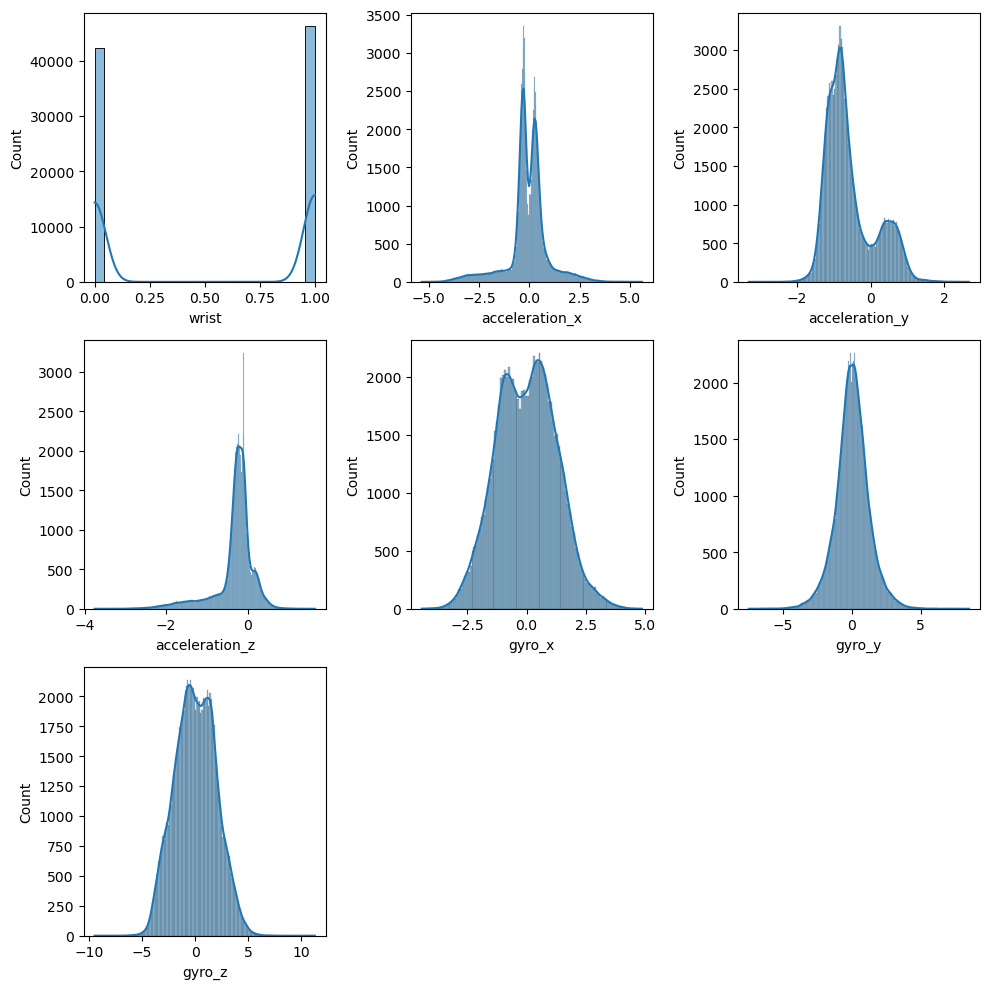

In [ ]:
plt.figure(figsize = (10,10))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(data1[i], kde = True)
    plotnumber = plotnumber + 1
plt.tight_layout()

*  Walking and Running Data distribution in histplot all distribution is peaked and possesses thick tails. It indicates a all Data distribution in kurtosis

### Bivariate analysis

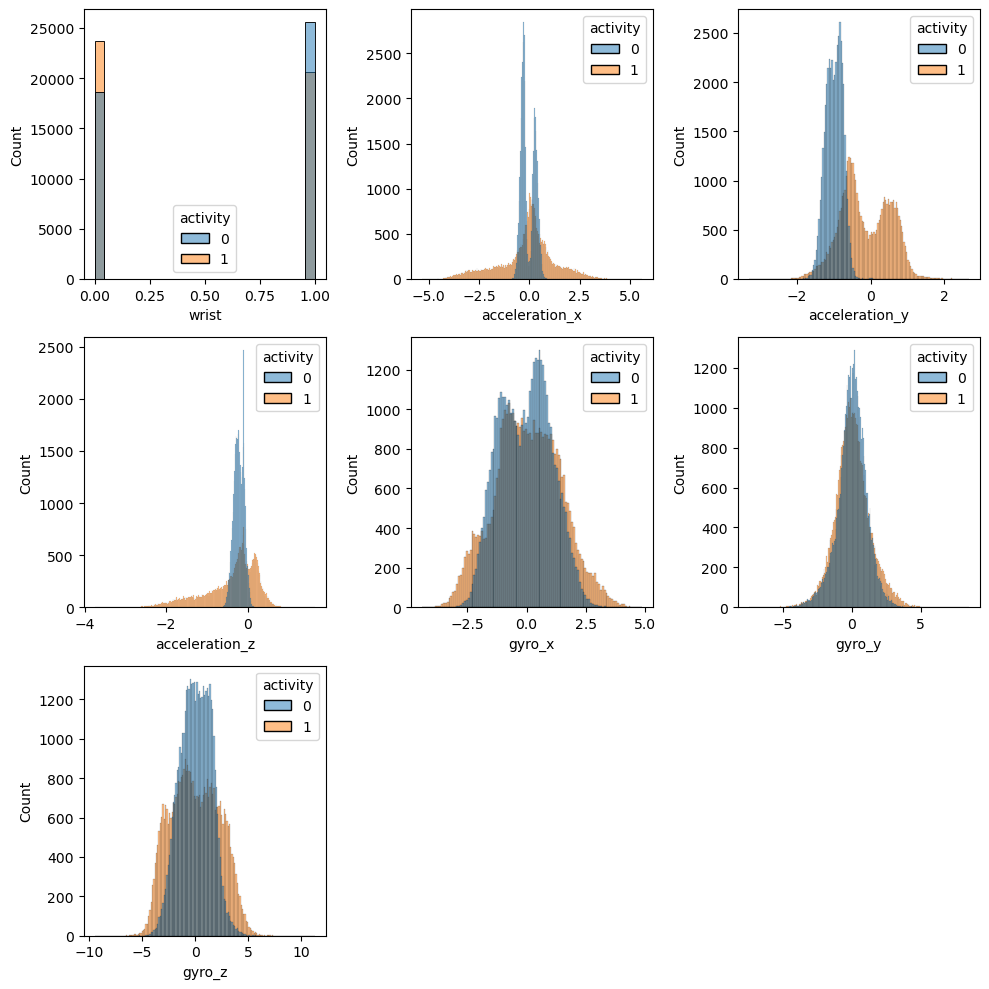

In [ ]:
plt.figure(figsize = (10,10))
plotnumber = 1

for i in data1:
    plt.subplot(3, 3, plotnumber)
    sns.histplot(x = data1[i], hue = data.activity)
    plotnumber = plotnumber + 1
plt.tight_layout()

* wrist, acceleration_x, acceleration_y, acceleration_z, gyro_x, gyro_y, gyro_z Data distribution for Activity

* gyro_x and Activity are almost over laping eatch other

# 7] Data preprocessing

#### Find missing values

In [ ]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [ ]:
# checking for the duplicated values

data.loc[data.duplicated()]

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


* There is no null values

### Handling with out layers

<Axes: xlabel='wrist'>

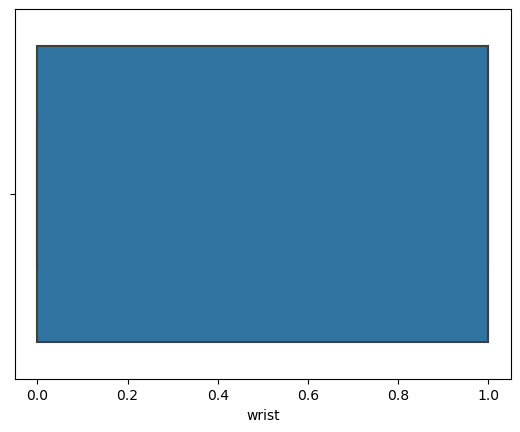

In [ ]:
sns.boxplot(x = data ['wrist'])

<Axes: xlabel='wrist'>

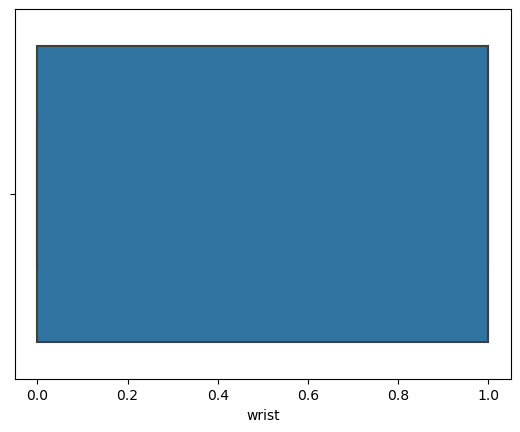

In [ ]:
sns.boxplot(x = data ['wrist'])

<Axes: xlabel='acceleration_x'>

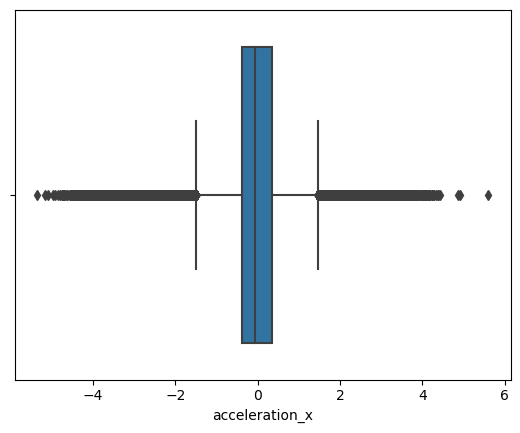

In [ ]:
sns.boxplot(x = data ['acceleration_x'])

<Axes: xlabel='acceleration_y'>

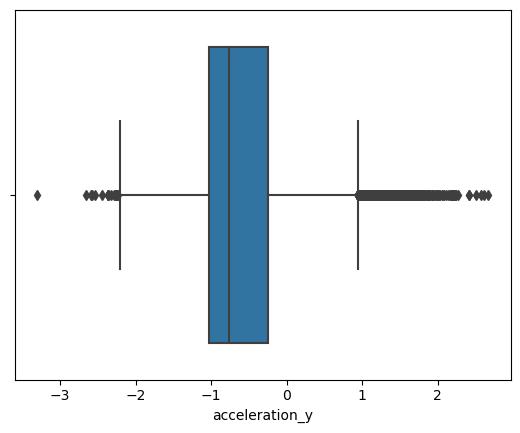

In [ ]:
sns.boxplot(x = data ['acceleration_y'])

<Axes: xlabel='acceleration_z'>

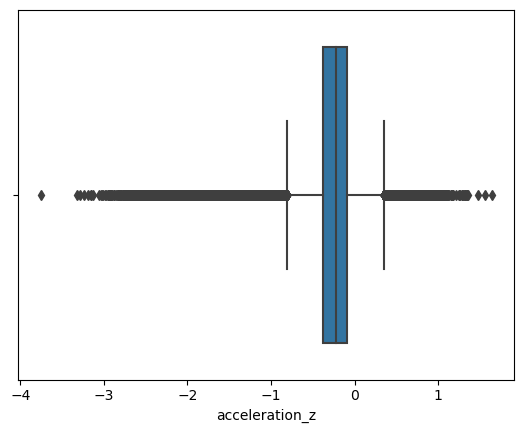

In [ ]:
sns.boxplot(x = data ['acceleration_z'])

<Axes: xlabel='gyro_x'>

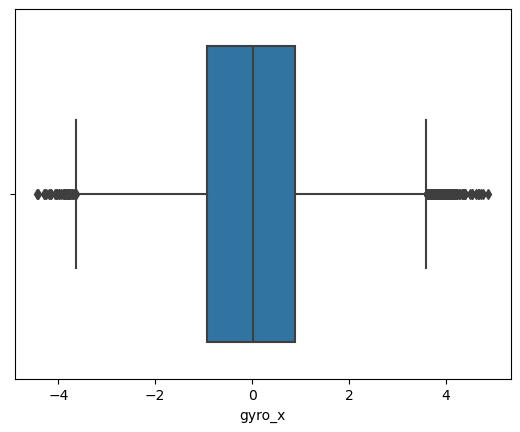

In [ ]:
sns.boxplot(x = data ['gyro_x'])

<Axes: xlabel='gyro_y'>

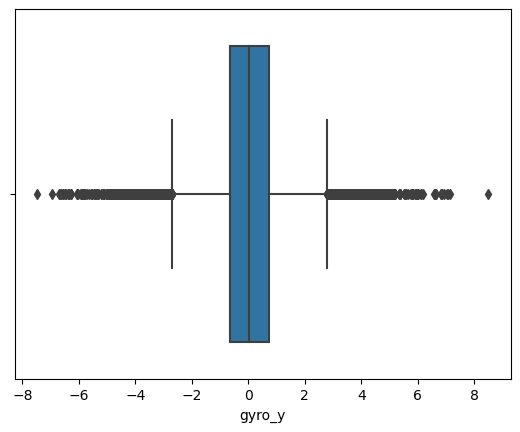

In [ ]:
sns.boxplot(x = data ['gyro_y'])

<Axes: xlabel='gyro_z'>

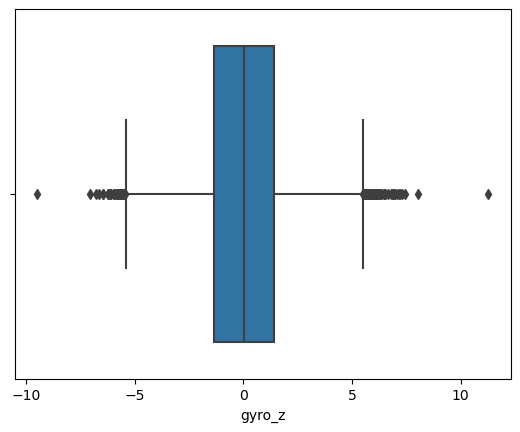

In [ ]:
sns.boxplot(x = data ['gyro_z'])

* no outlayers all data point looks in cluster

### Droping unwanted columns

In [ ]:
data.drop('date',axis=1,inplace=True)
data.drop('time',axis=1,inplace=True)
data.drop('username',axis=1,inplace=True)

In [ ]:
data

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


# Balancing the data

In [ ]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

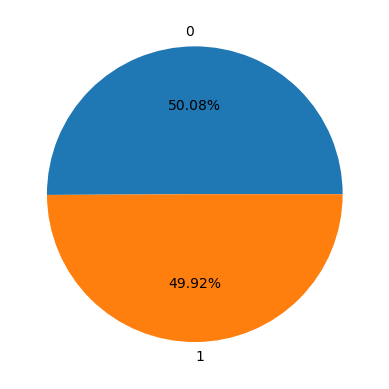

In [ ]:
plt.pie(data["activity"].value_counts(),labels=data["activity"].unique(),autopct="%0.2f%%")
plt.show()

* Data is balance ther is no need to do SMOT

#### Scaling and Balancing of data

In [ ]:
x = data.drop('activity',axis=1)

In [ ]:
x

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [ ]:
y = data.activity

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
88583    0
88584    0
88585    0
88586    0
88587    0
Name: activity, Length: 88588, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)

# Feature Selection Feature Engg

In [ ]:
data1=data[['wrist','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']]

<Axes: >

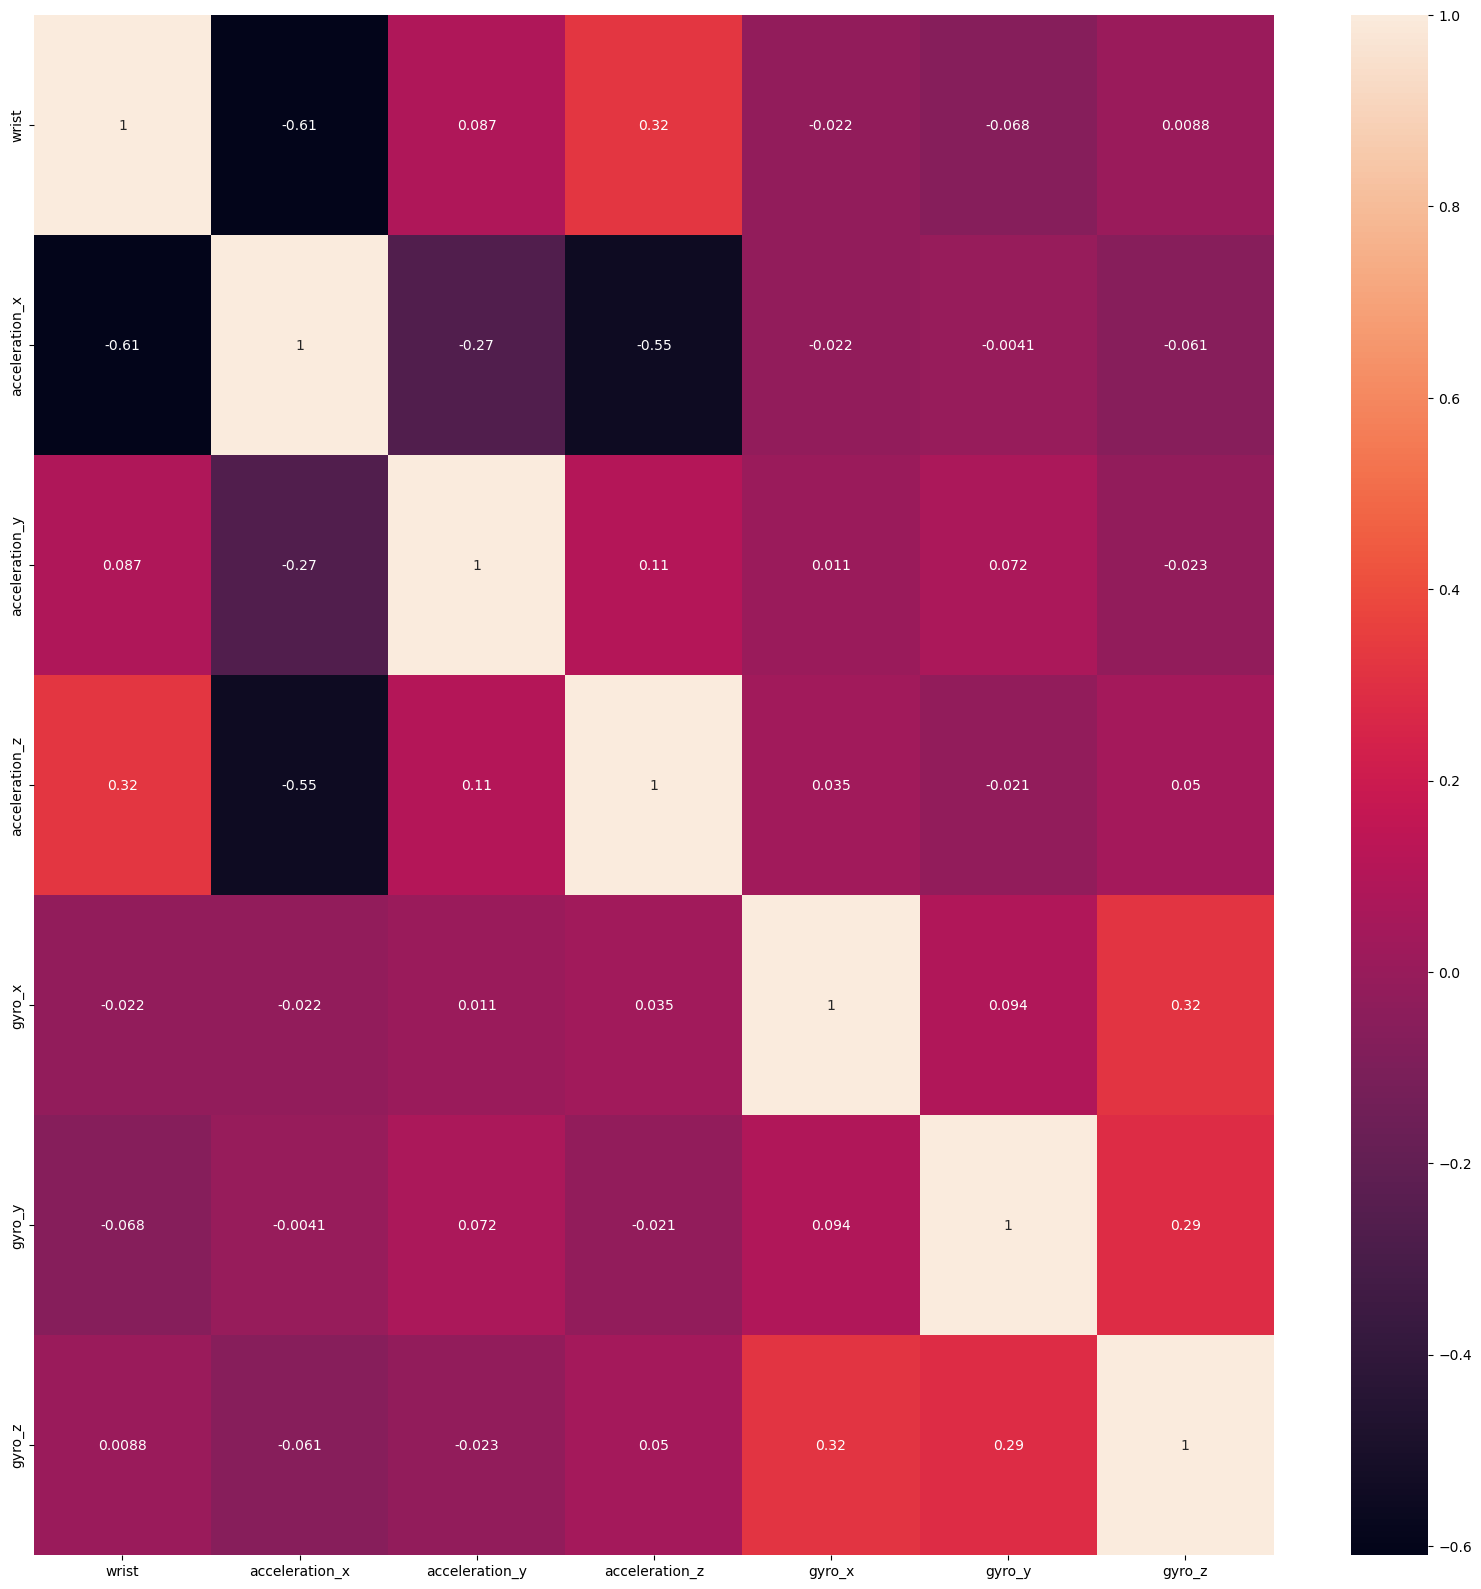

In [ ]:
# check the heatmap correlation
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True)

* ther is no co-relation between indipendint varibles

# Model Creation & Modle Evaluation

### Spliting data for train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((62011, 7), (26577, 7), (62011,), (26577,))

## 1.Logistic Regression

In [ ]:
# create Linear Regression model
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()   # object creation
LR.fit(x_train,y_train) # Training the model
y_pred=LR.predict(x_test)   # Test prediction
y1_pred = LR.predict(x_train) # Train prediction

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test.values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

### Evaluation Matrix for Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
precision_score(y_test, y_pred)

0.909481306837319

In [ ]:
recall_score(y_test, y_pred)

0.8116170724376315

In [ ]:
f1_score(y_test, y_pred)

0.8577668360864039

In [ ]:
confusion_matrix(y_test, y_pred)

array([[12194,  1075],
       [ 2507, 10801]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 0.8615245682217672
Test_Accuracy: 0.8652218083305113


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.825262,0.906653,0.861525,0.865958,0.866025
recall,0.916683,0.806549,0.861525,0.861616,0.861525
f1-score,0.868574,0.853676,0.861525,0.861125,0.861113
support,30954.000000,31057.000000,0.861525,62011.000000,62011.000000


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.829467,0.909481,0.865222,0.869474,0.869533
recall,0.918984,0.811617,0.865222,0.865301,0.865222
f1-score,0.871934,0.857767,0.865222,0.864851,0.864840
support,13269.000000,13308.000000,0.865222,26577.000000,26577.000000


## 2.KNNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()   # object creation
knn.fit(x_train,y_train) # Training the model
y_pred=knn.predict(x_test)  # Test prediction
y1_pred = knn.predict(x_train) # Train prediction

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test.values

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## Evaluation Matrix for KNNeighbors

In [ ]:
precision_score(y_test, y_pred)

0.9952326901248582

In [ ]:
recall_score(y_test, y_pred)

0.9882777276825969

In [ ]:
f1_score(y_test, y_pred)

0.9917430154959845

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13206,    63],
       [  156, 13152]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 0.9935979100482173
Test_Accuracy: 0.9917597923016142


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.990340,0.996888,0.993598,0.993614,0.993620
recall,0.996899,0.990308,0.993598,0.993603,0.993598
f1-score,0.993608,0.993587,0.993598,0.993598,0.993598
support,30954.000000,31057.000000,0.993598,62011.000000,62011.000000


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.988325,0.995233,0.99176,0.991779,0.991784
recall,0.995252,0.988278,0.99176,0.991765,0.991760
f1-score,0.991777,0.991743,0.99176,0.991760,0.991760
support,13269.000000,13308.000000,0.99176,26577.000000,26577.000000


## 3. Support Vector Machine- Classifier

In [ ]:
from sklearn.svm import SVC
# Creating an SVM classifier
clf = SVC(kernel='linear')

In [ ]:
clf.fit(x_train,y_train) # Training the model

SVC(kernel='linear')

In [ ]:
y_pred=SVC.predict(x_test)    # Test prediction

TypeError: BaseSVC.predict() missing 1 required positional argument: 'X'

In [ ]:
y1_pred = SVC.predict(x_train) # Train prediction

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test

81226    1
30269    0
27129    0
32408    0
74220    1
        ..
87438    1
19337    1
79275    0
9350     1
77265    0
Name: activity, Length: 26577, dtype: int64

### Evaluation Matrix for Support Vector Machine- Classifier

In [ ]:
precision_score(y_test, y_pred)

0.9952326901248582

In [ ]:
recall_score(y_test, y_pred)

0.9882777276825969

In [ ]:
f1_score(y_test, y_pred)

0.9917430154959845

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13206,    63],
       [  156, 13152]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 0.9935979100482173
Test_Accuracy: 0.9917597923016142


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.990340,0.996888,0.993598,0.993614,0.993620
recall,0.996899,0.990308,0.993598,0.993603,0.993598
f1-score,0.993608,0.993587,0.993598,0.993598,0.993598
support,30954.000000,31057.000000,0.993598,62011.000000,62011.000000


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.988325,0.995233,0.99176,0.991779,0.991784
recall,0.995252,0.988278,0.99176,0.991765,0.991760
f1-score,0.991777,0.991743,0.99176,0.991760,0.991760
support,13269.000000,13308.000000,0.99176,26577.000000,26577.000000


## 4.Decission Tree Algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)
y1_pred = dtc.predict(x_train)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test

81226    1
30269    0
27129    0
32408    0
74220    1
        ..
87438    1
19337    1
79275    0
9350     1
77265    0
Name: activity, Length: 26577, dtype: int64

### Evaluation Matrix for decission tree

In [ ]:
pcc = precision_score(y_test, y_pred)
pcc

0.9825271841019872

In [ ]:
rcc = recall_score(y_test, y_pred)
rcc

0.9845205891193267

In [ ]:
fc = f1_score(y_test, y_pred)
fc

0.9835228765529407

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13036,   233],
       [  206, 13102]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.9834819580840577


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,30954.0,31057.0,1.0,62011.0,62011.0


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.984443,0.982527,0.983482,0.983485,0.983484
recall,0.982440,0.984521,0.983482,0.983480,0.983482
f1-score,0.983441,0.983523,0.983482,0.983482,0.983482
support,13269.000000,13308.000000,0.983482,26577.000000,26577.000000


## 5.Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)
y1_pred = dtc.predict(x_train)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test

81226    1
30269    0
27129    0
32408    0
74220    1
        ..
87438    1
19337    1
79275    0
9350     1
77265    0
Name: activity, Length: 26577, dtype: int64

## Evaluation Matrix for Random Forest Classifier

In [ ]:
prc = precision_score(y_test, y_pred)
prc

0.9907720009002926

In [ ]:
rcc = recall_score(y_test, y_pred)
rcc

0.9923354373309288

In [ ]:
fc = f1_score(y_test, y_pred)
fc

0.9915531028268949

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13146,   123],
       [  102, 13206]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.99153403318659


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,30954.0,31057.0,1.0,62011.0,62011.0


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.992301,0.990772,0.991534,0.991536,0.991535
recall,0.990730,0.992335,0.991534,0.991533,0.991534
f1-score,0.991515,0.991553,0.991534,0.991534,0.991534
support,13269.000000,13308.000000,0.991534,26577.000000,26577.000000


## 6. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Creating a Naive Bayes classifier
clf = GaussianNB()
# Training the classifier on the training set
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y1_pred = dtc.predict(x_train)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test

81226    1
30269    0
27129    0
32408    0
74220    1
        ..
87438    1
19337    1
79275    0
9350     1
77265    0
Name: activity, Length: 26577, dtype: int64

### Evaluation Matrix for Random Forest Classifier

In [ ]:
prc = precision_score(y_test, y_pred)
prc

0.9891566265060241

In [ ]:
rcc = recall_score(y_test, y_pred)
rcc

0.9253832281334535

In [ ]:
fc = f1_score(y_test, y_pred)
fc

0.9562077801071512

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13134,   135],
       [  993, 12315]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.9575572863754374


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,30954.0,31057.0,1.0,62011.0,62011.0


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.929709,0.989157,0.957557,0.959433,0.959476
recall,0.989826,0.925383,0.957557,0.957605,0.957557
f1-score,0.958826,0.956208,0.957557,0.957517,0.957515
support,13269.000000,13308.000000,0.957557,26577.000000,26577.000000


## 7. Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,))
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y1_pred = dtc.predict(x_train)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [ ]:
y_test

81226    1
30269    0
27129    0
32408    0
74220    1
        ..
87438    1
19337    1
79275    0
9350     1
77265    0
Name: activity, Length: 26577, dtype: int64

### Evaluation Matrix for Random Forest Classifie

In [ ]:
prc = precision_score(y_test, y_pred)
prc

0.9946011710136111

In [ ]:
rcc = recall_score(y_test, y_pred)
rcc

0.9828674481514879

In [ ]:
fc = f1_score(y_test, y_pred)
fc

0.9886994973355002

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13198,    71],
       [  228, 13080]], dtype=int64)

In [ ]:
train_accuracy = accuracy_score(y_train, y1_pred)
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_Accuracy:", train_accuracy)
print("Test_Accuracy:", test_accuracy)

Train_Accuracy: 1.0
Test_Accuracy: 0.9887496707679573


In [ ]:
# Evaluating the classification report of the train data
pd.DataFrame(classification_report(y_train,y1_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,30954.0,31057.0,1.0,62011.0,62011.0


In [ ]:
# Evaluating the classification report of the test data
pd.DataFrame(classification_report(y_test, y_pred,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.983018,0.994601,0.98875,0.988810,0.988818
recall,0.994649,0.982867,0.98875,0.988758,0.988750
f1-score,0.988799,0.988699,0.98875,0.988749,0.988749
support,13269.000000,13308.000000,0.98875,26577.000000,26577.000000


## Comparison Report of the Models

In [ ]:
from prettytable import PrettyTable
x=PrettyTable()

In [ ]:
x.field_names = ["Model","(train)Accuracy", "(test)Accuracy"]
x.add_row(["Logistic Regression",'86.5 %','86.1%'])
x.add_row(["Decision Trees Classifier",' 100 %','98.3 %'])
x.add_row(["Support Vector Machine Classifier",' 99.3 %','99.1 %'])
x.add_row(["Random Forest Classifier", '100 %','99.1 %'])
x.add_row(["K-Nearest Neighbor Classifier", '99.3 %','99.1%'])
x.add_row(["Naive Bayes classifier",'100 %','95.7 %'])
x.add_row(["Neural Network classifier",'100%','99 %'])

In [ ]:
print(x)

+-----------------------------------+-----------------+----------------+
|               Model               | (train)Accuracy | (test)Accuracy |
+-----------------------------------+-----------------+----------------+
|        Logistic Regression        |      86.5 %     |     86.1%      |
|     Decision Trees Classifier     |       100 %     |     98.3 %     |
| Support Vector Machine Classifier |      99.3 %     |     99.1 %     |
|      Random Forest Classifier     |      100 %      |     99.1 %     |
|   K-Nearest Neighbor Classifier   |      99.3 %     |     99.1%      |
|       Naive Bayes classifier      |      100 %      |     95.7 %     |
|     Neural Network classifier     |       100%      |      99 %      |
+-----------------------------------+-----------------+----------------+


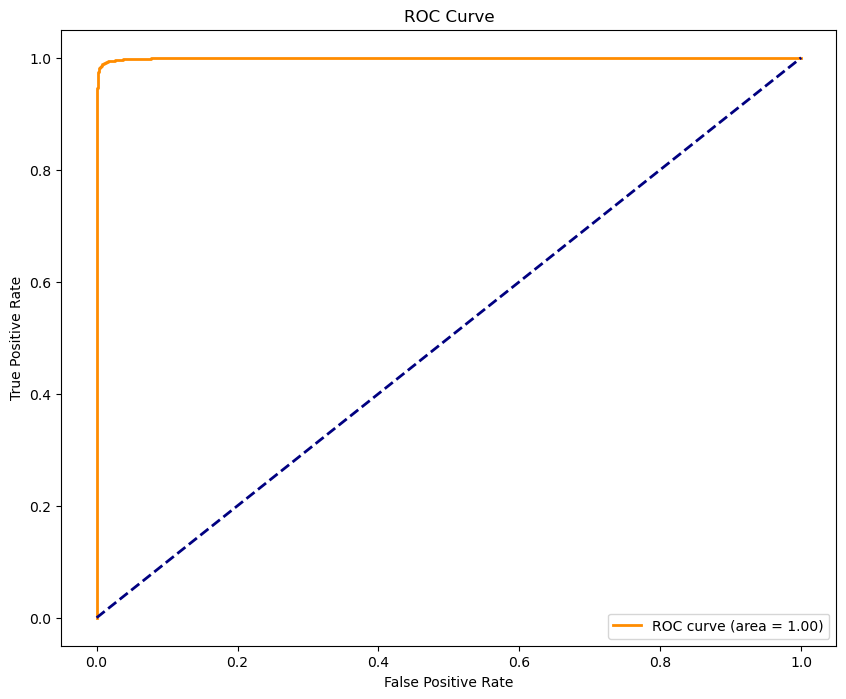

AUC Score: 0.9992107658858863


In [ ]:
from sklearn.metrics import roc_curve, auc


# Predicting probabilities on test data
y_prob = clf.predict_proba(x_test)[:, 1]

# Computing ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Printing AUC score
print("AUC Score:", roc_auc)

# Conclusion

* Decision Trees Classifier: The Decision Trees Classifier has a training accuracy of 100% and a testing accuracy of 98.3%. This suggests that the model is likely to perform well on new data.

* Support Vector Machine Classifier: The Support Vector Machine Classifier has a training accuracy of 99.3% and a testing accuracy of 99.1%. This suggests that the model is likely to perform well on new data.

* Random Forest Classifier: The random forest classifier has a training accuracy of 100% and a testing accuracy of 99.1%. This suggests that the model is likely to perform well on new data.

* KNN Classifier: The KNN classifier has a training accuracy of 99.3% and a testing accuracy of 99.1%. This indicates that the model is not performing well and may require further optimization.

* Naive Bayes Classifier: The Naive Bayes classifier has a training accuracy of 100% and a testing accuracy of 95.7%. This indicates that the model is performing well and is able to generalize to new data.

* Neural Network Classifier: The neural network classifier has a training accuracy of 100% and a testing accuracy of 99%. Although the training accuracy is slightly better than the testing accuracy, the model seems to be performing well.

* In conclusion, the Decision Trees Classifier,Support Vector Machine Classifier, random forest classifier, Naive Bayes classifier, and neural network classifier and KNN Classifier seem to be the best performing models, as they have high testing accuracies and are likely to generalize well to new data. The logistic regression may require further optimization to improve their performance.